In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
from sklearn.neighbors import NearestNeighbors

from os import replace

import warnings
warnings.filterwarnings("ignore")

import sys
sys.path.append('/content/drive/MyDrive/Università/[2023-2024] DIQ/PROGETTO/SCRIPTS')

from A_data_collection import make_dataset_for_classification, make_dataset_for_regression, make_dataset_for_clustering
from D_data_analysis import classification, clustering, regression
from E_plot_results import plot

In [ ]:
CLUSTERING_ALGORITHMS = ["KMeans","Agglomerative","Spectral","OPTICS","BIRCH"]
SEED = 2023
np.random.seed(SEED)

### Data Pollution

In [ ]:
def make_outliers(df, outlier_percentage, outlier_distance):
  df_copy = df.copy()
  n_samples = df_copy.shape[0]
  n_features = df_copy.shape[1]

  # Add outliers
  num_outliers = int(n_samples*outlier_percentage / 100)
  outliers = np.random.rand(num_outliers)
  polluted_indices_casual = np.random.choice(n_samples, size = num_outliers, replace=False)
  for i in range(num_outliers):
    feature_to_pollute = np.random.choice(n_features)
    df_copy.iloc[polluted_indices_casual[i]][feature_to_pollute] = outliers[i] * outlier_distance * df_copy.median()[feature_to_pollute]

  return df_copy

 ### Outlier detection methods

In [ ]:
def find_index(values, array):
    indexes = []

    for i, item in enumerate(array):
        if item in values:
            indexes.append(i)

    return indexes

In [ ]:
def LOF_outlier_detection(X):
    data = X
    # requires no missing value
    # select top 10 outliers


    # fit the model for outlier detection (default)
    clf = LocalOutlierFactor(n_neighbors=4, contamination=0.1)

    clf.fit_predict(X)

    LOF_scores = clf.negative_outlier_factor_
    # Outliers tend to have a negative score far from -1

    #print(LOF_scores)

    outliers = X[LOF_scores < -1.9].index

    return outliers
    #print("Outliers: ", data.iloc[outliers])

In [ ]:
def ZSB(data, threshold):
    # Robust Zscore as a function of median and median
    # median absolute deviation (MAD) defined as
    # z-score = |x – median(x)| / mad(x)
    median = np.median(data)
    median_absolute_deviation = np.median(np.abs(data - median))
    modified_z_scores = (data - median) / median_absolute_deviation
    outliers = data[np.abs(modified_z_scores) > threshold]
    out_index = find_index(outliers, data)
    return out_index

In [ ]:
def ZS(data, threshold):
  mean = np.mean(data)
  sd = np.std(data) # calculate standard deviation
  outliers = [] # create empty list to store outliers
  for i in data: # detect outliers
    z = (i - mean) / sd  # calculate z-score
    if abs(z) > threshold:  # identify outliers
      outliers.append(i)  # add to the empty list
  out_index = find_index(outliers, data)
  return out_index

In [ ]:
def KNN_outlierdetect(df):
  X = df.values
  KNN = NearestNeighbors(n_neighbors = 3)

  #Fit model
  KNN.fit(X)

  #Distances and indexes of k-neaighbors from model outputs
  distances, indexes = KNN.kneighbors(X)
  #Visually determine cutoff values > 0.25
  OUTLIER_INDEX = np.where(distances.mean(axis = 1) > 2)
  return np.array(OUTLIER_INDEX[0])

### Analysis

#### Accuracy

Training for KMeans...
LO SHAPE è (997, 4)
Training for KMeans...
Training for KMeans...
LO SHAPE è (998, 4)
Training for KMeans...
Training for KMeans...
LO SHAPE è (999, 4)
Training for KMeans...
Training for KMeans...
LO SHAPE è (1000, 4)
Training for KMeans...
Training for KMeans...
LO SHAPE è (1000, 4)
Training for KMeans...
Training for KMeans...
LO SHAPE è (1000, 4)
Training for KMeans...
Training for KMeans...
LO SHAPE è (999, 4)
Training for KMeans...
Training for KMeans...
LO SHAPE è (1000, 4)
Training for KMeans...
Training for KMeans...
LO SHAPE è (999, 4)
Training for KMeans...
Training for KMeans...
LO SHAPE è (998, 4)
Training for KMeans...
Training for Agglomerative...
LO SHAPE è (993, 4)
Training for Agglomerative...
Training for Agglomerative...
LO SHAPE è (998, 4)
Training for Agglomerative...
Training for Agglomerative...
LO SHAPE è (999, 4)
Training for Agglomerative...
Training for Agglomerative...
LO SHAPE è (1000, 4)
Training for Agglomerative...
Training for Ag

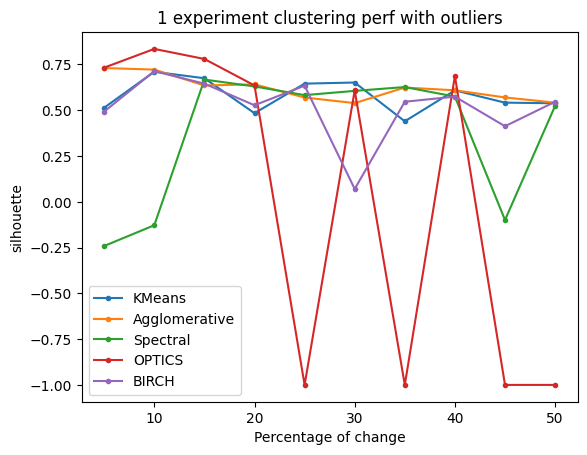

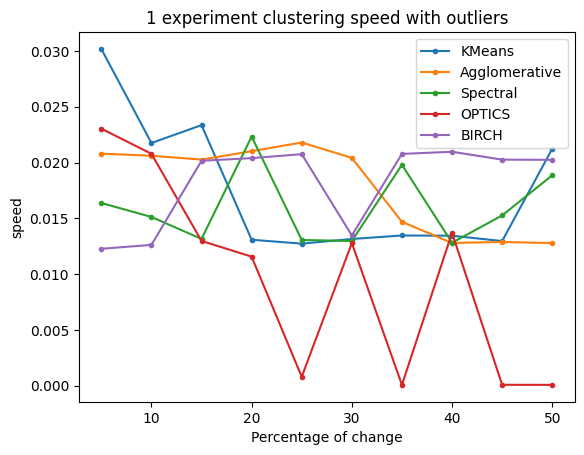

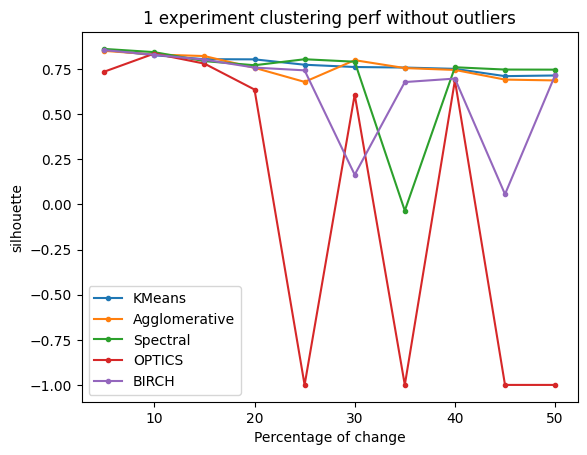

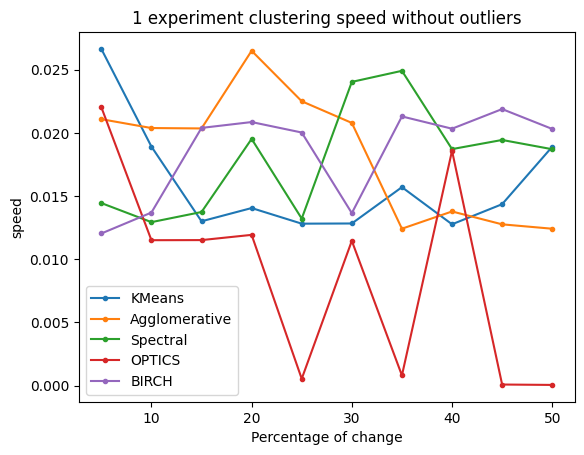

Training for KMeans...
LO SHAPE è (990, 4)
Training for KMeans...
Training for KMeans...
LO SHAPE è (987, 4)
Training for KMeans...
Training for KMeans...
LO SHAPE è (988, 4)
Training for KMeans...
Training for KMeans...
LO SHAPE è (993, 4)
Training for KMeans...
Training for KMeans...
LO SHAPE è (997, 4)
Training for KMeans...
Training for KMeans...
LO SHAPE è (997, 4)
Training for KMeans...
Training for KMeans...
LO SHAPE è (996, 4)
Training for KMeans...
Training for KMeans...
LO SHAPE è (1000, 4)
Training for KMeans...
Training for KMeans...
LO SHAPE è (996, 4)
Training for KMeans...
Training for KMeans...
LO SHAPE è (997, 4)
Training for KMeans...
Training for Agglomerative...
LO SHAPE è (987, 4)
Training for Agglomerative...
Training for Agglomerative...
LO SHAPE è (992, 4)
Training for Agglomerative...
Training for Agglomerative...
LO SHAPE è (995, 4)
Training for Agglomerative...
Training for Agglomerative...
LO SHAPE è (999, 4)
Training for Agglomerative...
Training for Agglom

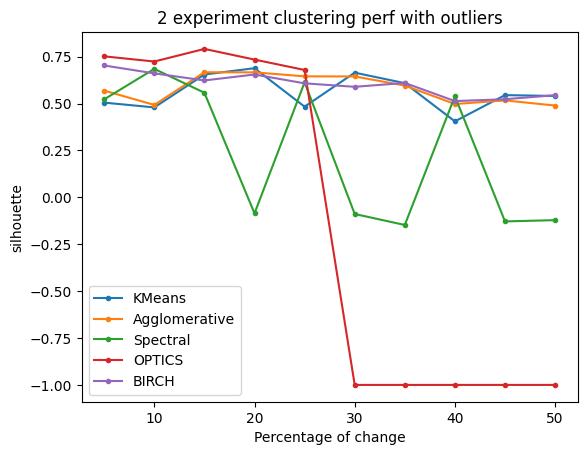

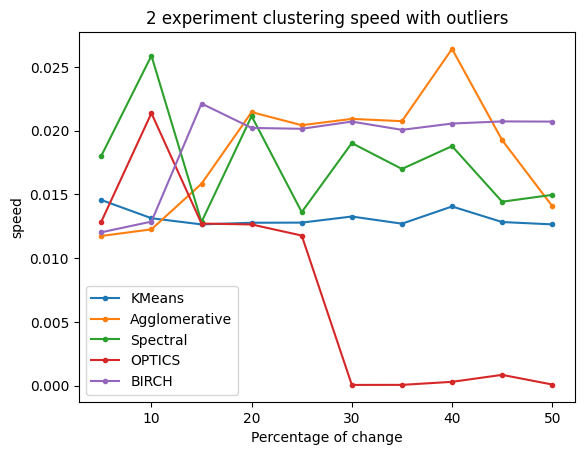

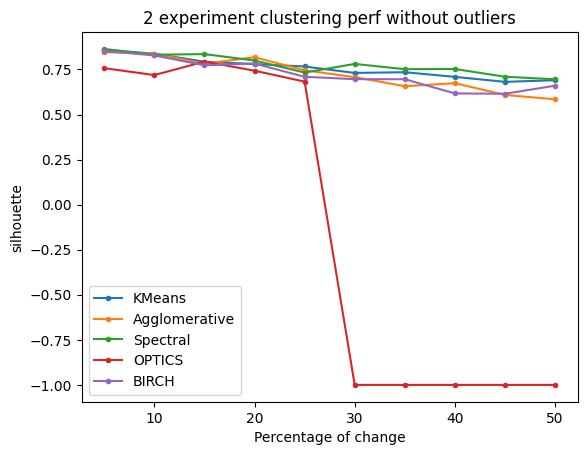

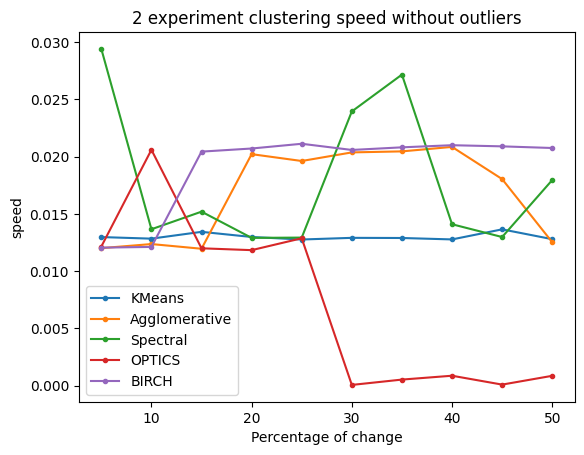

Training for KMeans...
LO SHAPE è (986, 4)
Training for KMeans...
Training for KMeans...
LO SHAPE è (970, 4)
Training for KMeans...
Training for KMeans...
LO SHAPE è (975, 4)
Training for KMeans...
Training for KMeans...
LO SHAPE è (984, 4)
Training for KMeans...
Training for KMeans...
LO SHAPE è (988, 4)
Training for KMeans...
Training for KMeans...
LO SHAPE è (996, 4)
Training for KMeans...
Training for KMeans...
LO SHAPE è (993, 4)
Training for KMeans...
Training for KMeans...
LO SHAPE è (1000, 4)
Training for KMeans...
Training for KMeans...
LO SHAPE è (996, 4)
Training for KMeans...
Training for KMeans...
LO SHAPE è (995, 4)
Training for KMeans...
Training for Agglomerative...
LO SHAPE è (983, 4)
Training for Agglomerative...
Training for Agglomerative...
LO SHAPE è (981, 4)
Training for Agglomerative...
Training for Agglomerative...
LO SHAPE è (985, 4)
Training for Agglomerative...
Training for Agglomerative...
LO SHAPE è (991, 4)
Training for Agglomerative...
Training for Agglom

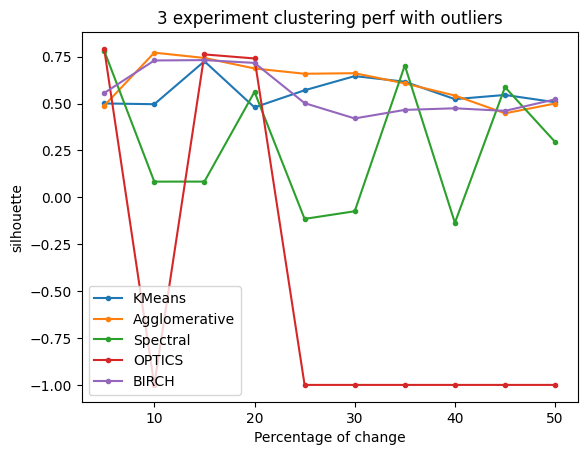

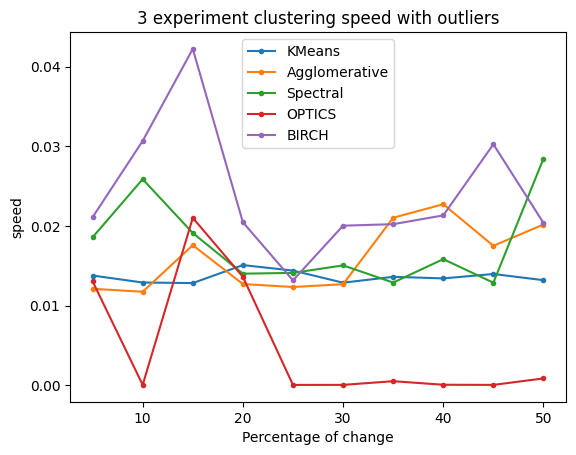

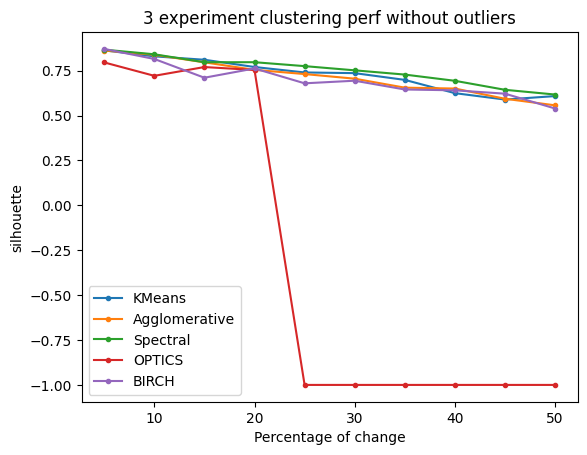

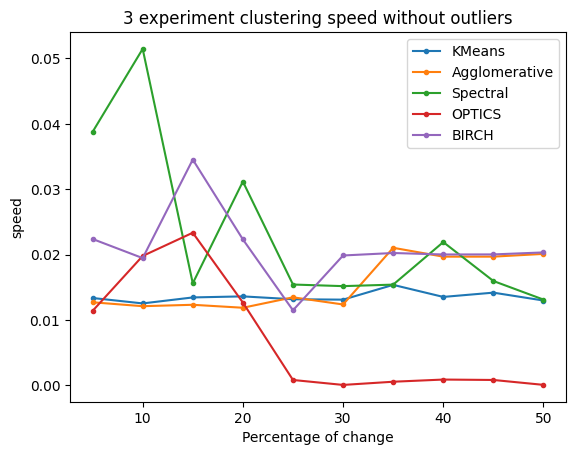

Training for KMeans...
LO SHAPE è (977, 4)
Training for KMeans...
Training for KMeans...
LO SHAPE è (973, 4)
Training for KMeans...
Training for KMeans...
LO SHAPE è (976, 4)
Training for KMeans...
Training for KMeans...
LO SHAPE è (970, 4)
Training for KMeans...
Training for KMeans...
LO SHAPE è (990, 4)
Training for KMeans...
Training for KMeans...
LO SHAPE è (988, 4)
Training for KMeans...
Training for KMeans...
LO SHAPE è (983, 4)
Training for KMeans...
Training for KMeans...
LO SHAPE è (987, 4)
Training for KMeans...
Training for KMeans...
LO SHAPE è (993, 4)
Training for KMeans...
Training for KMeans...
LO SHAPE è (990, 4)
Training for KMeans...
Training for Agglomerative...
LO SHAPE è (969, 4)
Training for Agglomerative...
Training for Agglomerative...
LO SHAPE è (969, 4)
Training for Agglomerative...
Training for Agglomerative...
LO SHAPE è (973, 4)
Training for Agglomerative...
Training for Agglomerative...
LO SHAPE è (979, 4)
Training for Agglomerative...
Training for Agglome

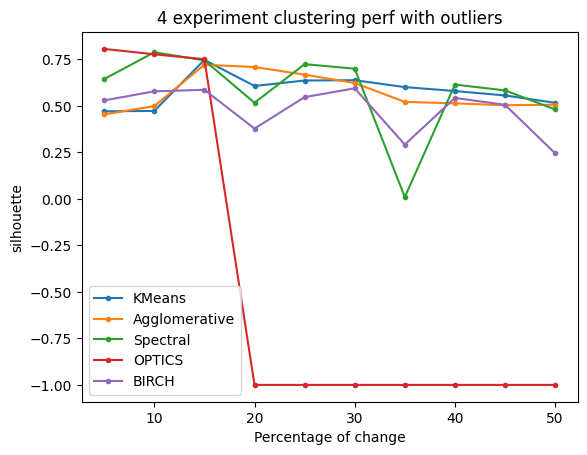

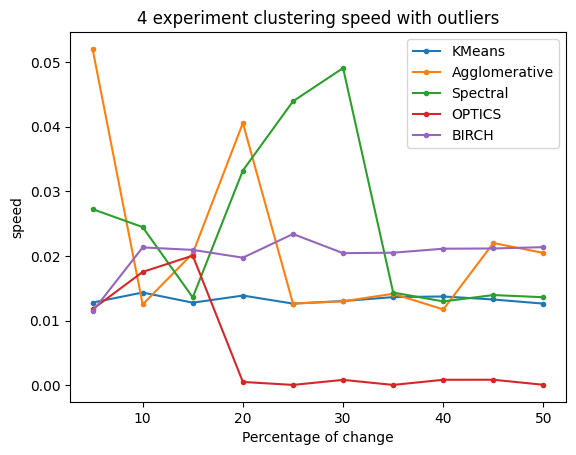

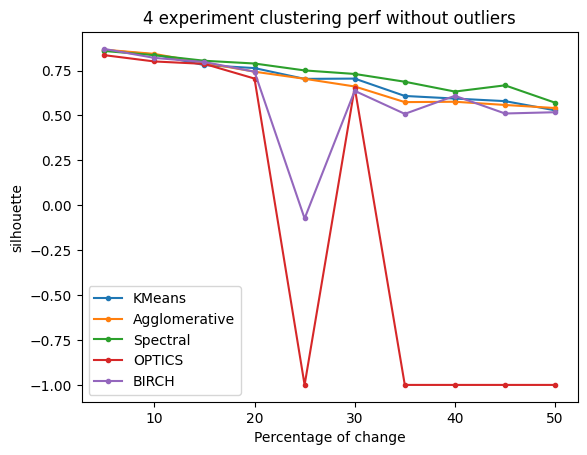

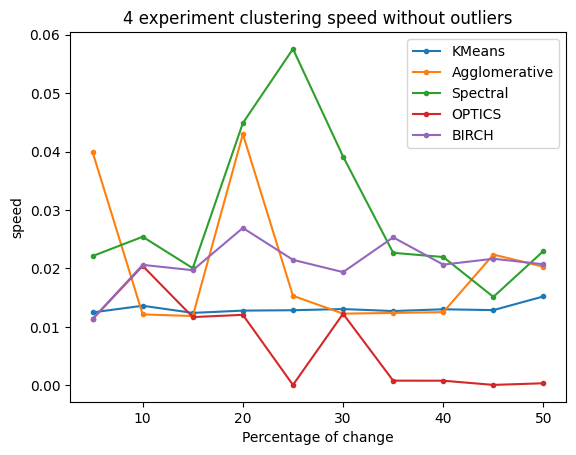

Training for KMeans...
LO SHAPE è (981, 4)
Training for KMeans...
Training for KMeans...
LO SHAPE è (947, 4)
Training for KMeans...
Training for KMeans...
LO SHAPE è (949, 4)
Training for KMeans...
Training for KMeans...
LO SHAPE è (958, 4)
Training for KMeans...
Training for KMeans...
LO SHAPE è (955, 4)
Training for KMeans...
Training for KMeans...
LO SHAPE è (969, 4)
Training for KMeans...
Training for KMeans...
LO SHAPE è (957, 4)
Training for KMeans...
Training for KMeans...
LO SHAPE è (967, 4)
Training for KMeans...
Training for KMeans...
LO SHAPE è (986, 4)
Training for KMeans...
Training for KMeans...
LO SHAPE è (987, 4)
Training for KMeans...
Training for Agglomerative...
LO SHAPE è (967, 4)
Training for Agglomerative...
Training for Agglomerative...
LO SHAPE è (946, 4)
Training for Agglomerative...
Training for Agglomerative...
LO SHAPE è (947, 4)
Training for Agglomerative...
Training for Agglomerative...
LO SHAPE è (965, 4)
Training for Agglomerative...
Training for Agglome

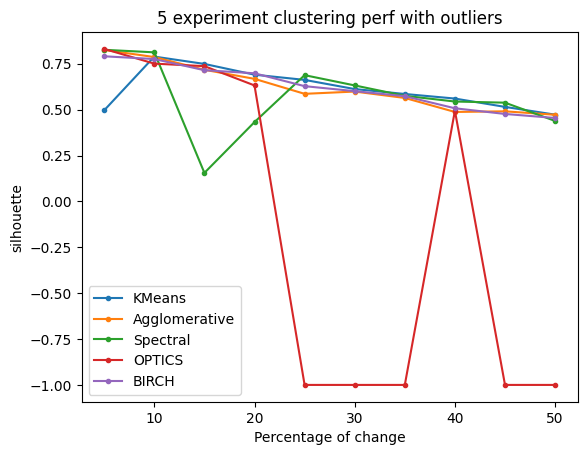

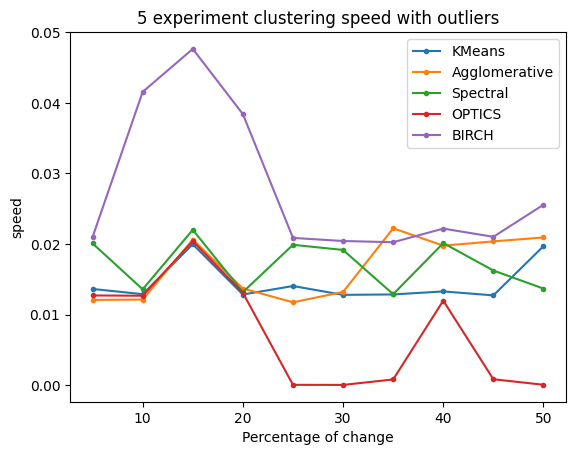

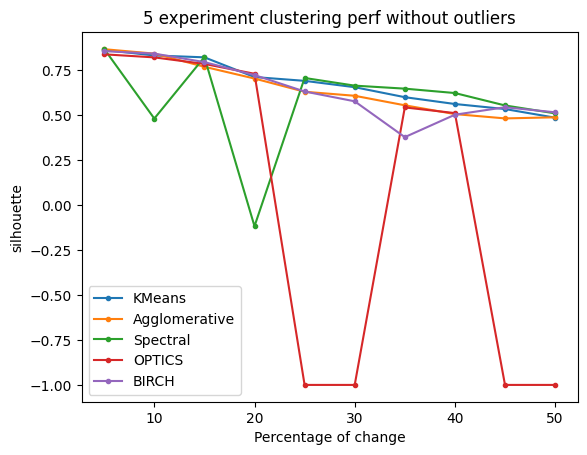

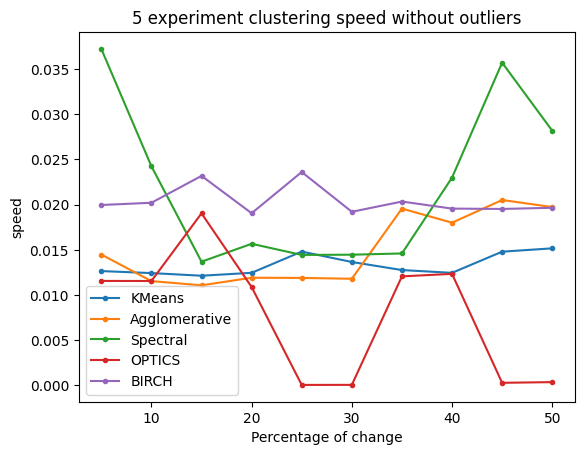

Training for KMeans...
LO SHAPE è (964, 4)
Training for KMeans...
Training for KMeans...
LO SHAPE è (935, 4)
Training for KMeans...
Training for KMeans...
LO SHAPE è (926, 4)
Training for KMeans...
Training for KMeans...
LO SHAPE è (930, 4)
Training for KMeans...
Training for KMeans...
LO SHAPE è (923, 4)
Training for KMeans...
Training for KMeans...
LO SHAPE è (917, 4)
Training for KMeans...
Training for KMeans...
LO SHAPE è (938, 4)
Training for KMeans...
Training for KMeans...
LO SHAPE è (930, 4)
Training for KMeans...
Training for KMeans...
LO SHAPE è (939, 4)
Training for KMeans...
Training for KMeans...
LO SHAPE è (953, 4)
Training for KMeans...
Training for Agglomerative...
LO SHAPE è (954, 4)
Training for Agglomerative...
Training for Agglomerative...
LO SHAPE è (934, 4)
Training for Agglomerative...
Training for Agglomerative...
LO SHAPE è (942, 4)
Training for Agglomerative...
Training for Agglomerative...
LO SHAPE è (911, 4)
Training for Agglomerative...
Training for Agglome

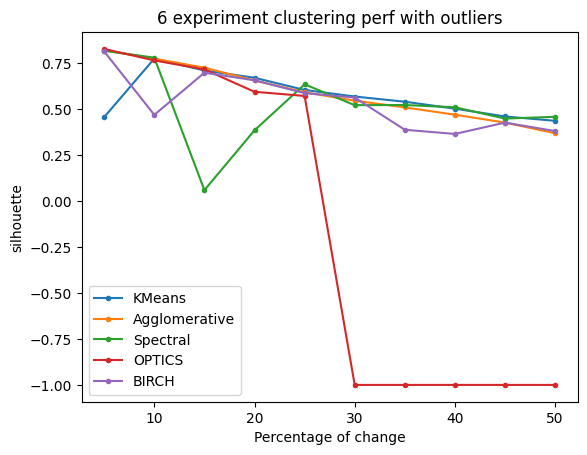

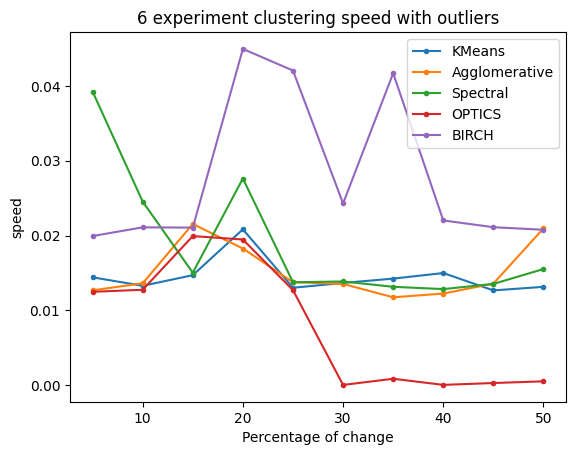

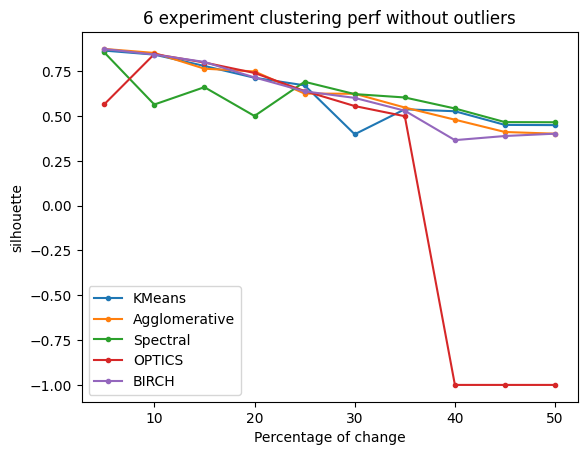

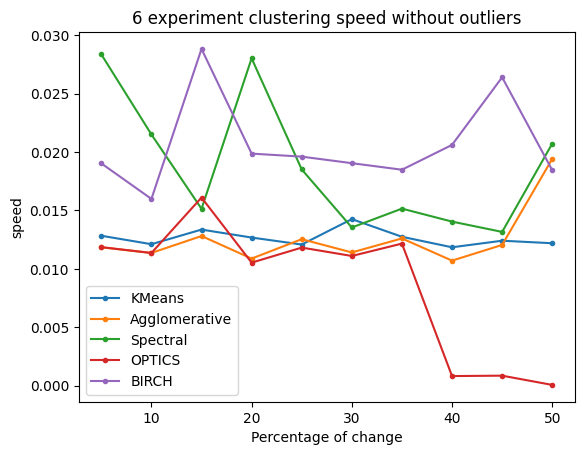

Training for KMeans...
LO SHAPE è (963, 4)
Training for KMeans...
Training for KMeans...
LO SHAPE è (921, 4)
Training for KMeans...
Training for KMeans...
LO SHAPE è (900, 4)
Training for KMeans...
Training for KMeans...
LO SHAPE è (906, 4)
Training for KMeans...
Training for KMeans...
LO SHAPE è (875, 4)
Training for KMeans...
Training for KMeans...
LO SHAPE è (878, 4)
Training for KMeans...
Training for KMeans...
LO SHAPE è (864, 4)
Training for KMeans...
Training for KMeans...
LO SHAPE è (862, 4)
Training for KMeans...
Training for KMeans...
LO SHAPE è (877, 4)
Training for KMeans...
Training for KMeans...
LO SHAPE è (883, 4)
Training for KMeans...
Training for Agglomerative...
LO SHAPE è (955, 4)
Training for Agglomerative...
Training for Agglomerative...
LO SHAPE è (927, 4)
Training for Agglomerative...
Training for Agglomerative...
LO SHAPE è (886, 4)
Training for Agglomerative...
Training for Agglomerative...
LO SHAPE è (868, 4)
Training for Agglomerative...
Training for Agglome

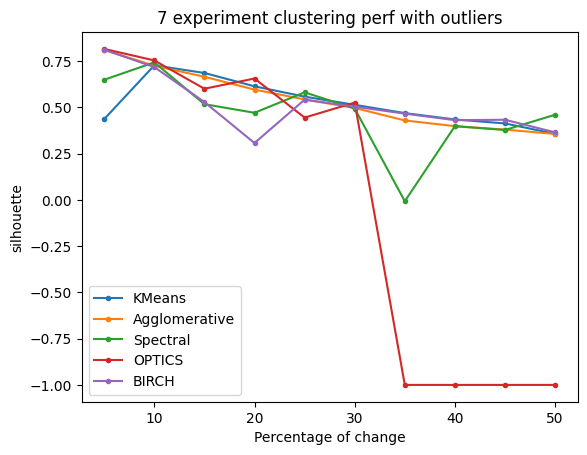

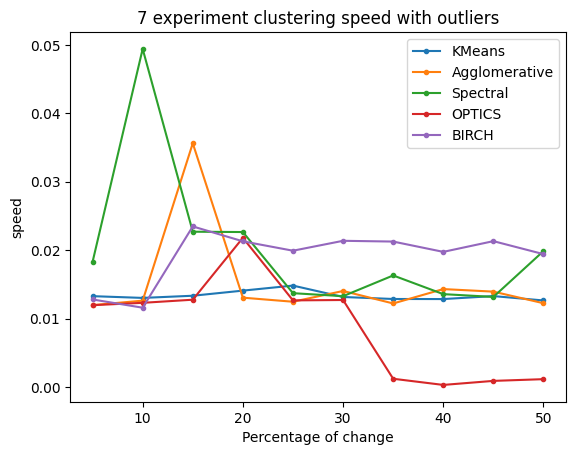

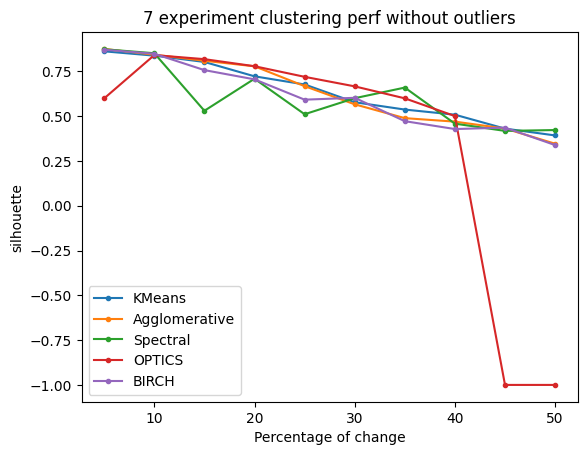

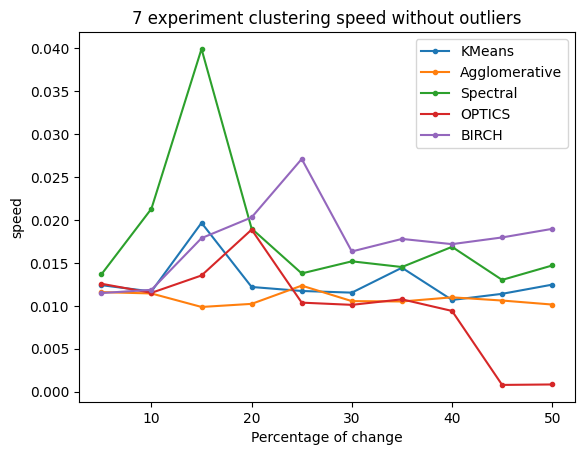

Training for KMeans...
LO SHAPE è (957, 4)
Training for KMeans...
Training for KMeans...
LO SHAPE è (913, 4)
Training for KMeans...
Training for KMeans...
LO SHAPE è (877, 4)
Training for KMeans...
Training for KMeans...
LO SHAPE è (855, 4)
Training for KMeans...
Training for KMeans...
LO SHAPE è (841, 4)
Training for KMeans...
Training for KMeans...
LO SHAPE è (832, 4)
Training for KMeans...
Training for KMeans...
LO SHAPE è (872, 4)
Training for KMeans...
Training for KMeans...
LO SHAPE è (824, 4)
Training for KMeans...
Training for KMeans...
LO SHAPE è (823, 4)
Training for KMeans...
Training for KMeans...
LO SHAPE è (823, 4)
Training for KMeans...
Training for Agglomerative...
LO SHAPE è (955, 4)
Training for Agglomerative...
Training for Agglomerative...
LO SHAPE è (933, 4)
Training for Agglomerative...
Training for Agglomerative...
LO SHAPE è (880, 4)
Training for Agglomerative...
Training for Agglomerative...
LO SHAPE è (879, 4)
Training for Agglomerative...
Training for Agglome

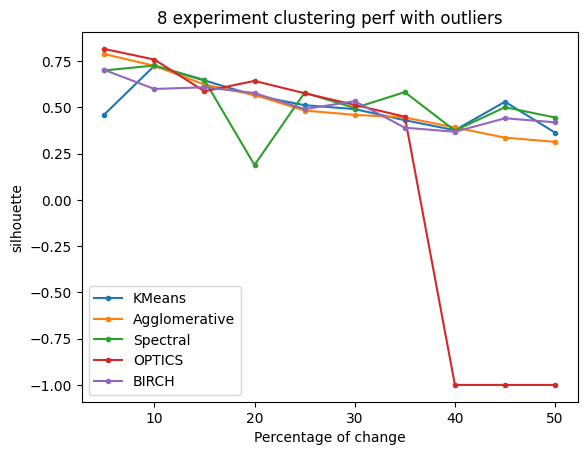

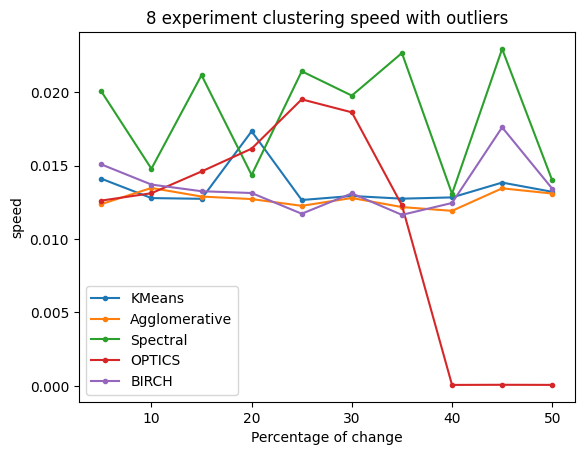

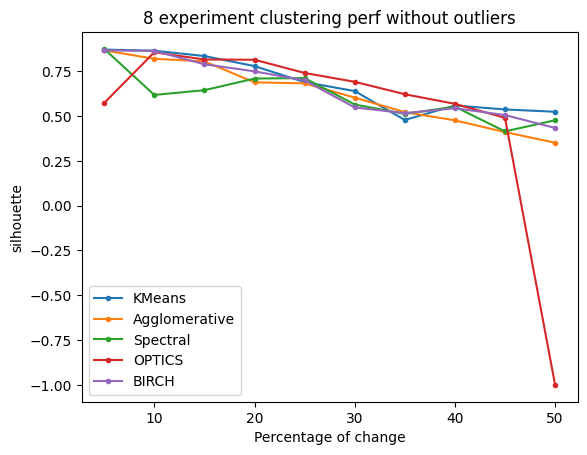

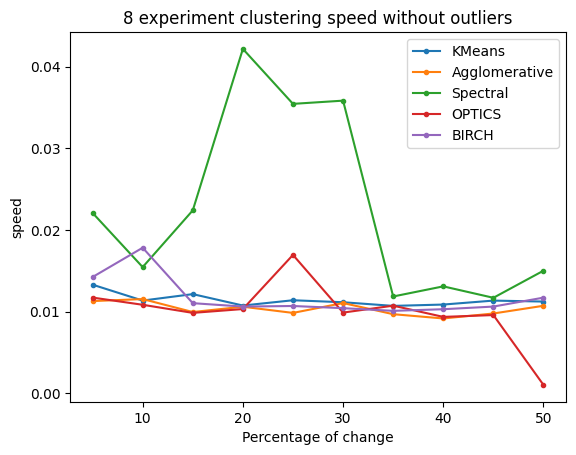

Training for KMeans...
LO SHAPE è (952, 4)
Training for KMeans...
Training for KMeans...
LO SHAPE è (917, 4)
Training for KMeans...
Training for KMeans...
LO SHAPE è (884, 4)
Training for KMeans...
Training for KMeans...
LO SHAPE è (835, 4)
Training for KMeans...
Training for KMeans...
LO SHAPE è (815, 4)
Training for KMeans...
Training for KMeans...
LO SHAPE è (817, 4)
Training for KMeans...
Training for KMeans...
LO SHAPE è (805, 4)
Training for KMeans...
Training for KMeans...
LO SHAPE è (800, 4)
Training for KMeans...
Training for KMeans...
LO SHAPE è (789, 4)
Training for KMeans...
Training for KMeans...
LO SHAPE è (779, 4)
Training for KMeans...
Training for Agglomerative...
LO SHAPE è (954, 4)
Training for Agglomerative...
Training for Agglomerative...
LO SHAPE è (912, 4)
Training for Agglomerative...
Training for Agglomerative...
LO SHAPE è (880, 4)
Training for Agglomerative...
Training for Agglomerative...
LO SHAPE è (868, 4)
Training for Agglomerative...
Training for Agglome

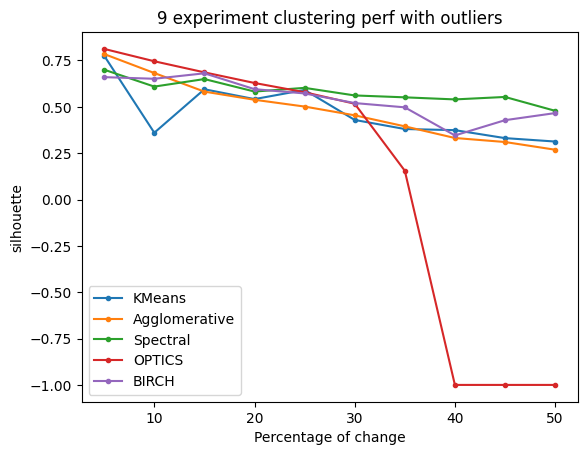

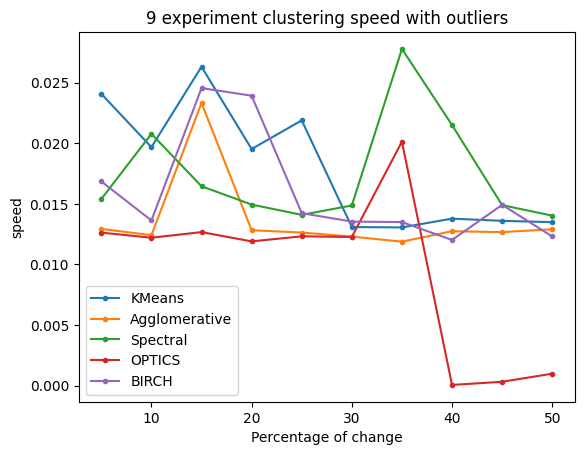

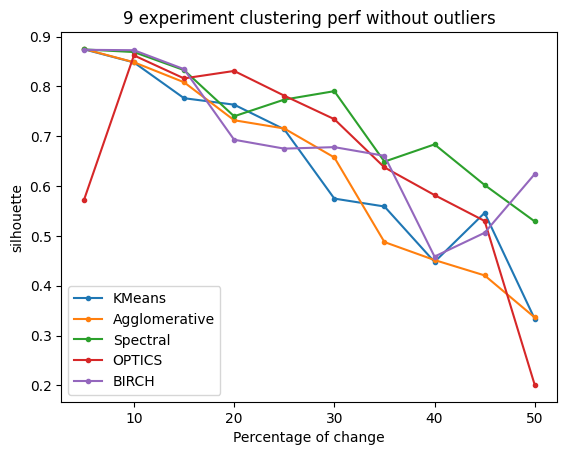

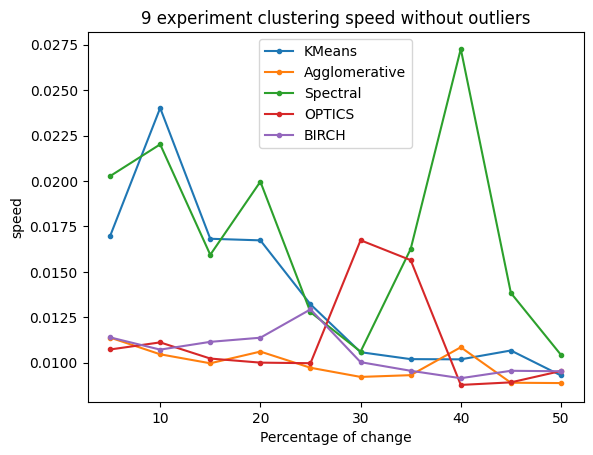

Training for KMeans...
LO SHAPE è (952, 4)
Training for KMeans...
Training for KMeans...
LO SHAPE è (911, 4)
Training for KMeans...
Training for KMeans...
LO SHAPE è (863, 4)
Training for KMeans...
Training for KMeans...
LO SHAPE è (853, 4)
Training for KMeans...
Training for KMeans...
LO SHAPE è (814, 4)
Training for KMeans...
Training for KMeans...
LO SHAPE è (767, 4)
Training for KMeans...
Training for KMeans...
LO SHAPE è (777, 4)
Training for KMeans...
Training for KMeans...
LO SHAPE è (747, 4)
Training for KMeans...
Training for KMeans...
LO SHAPE è (761, 4)
Training for KMeans...
Training for KMeans...
LO SHAPE è (743, 4)
Training for KMeans...
Training for Agglomerative...
LO SHAPE è (955, 4)
Training for Agglomerative...
Training for Agglomerative...
LO SHAPE è (902, 4)
Training for Agglomerative...
Training for Agglomerative...
LO SHAPE è (870, 4)
Training for Agglomerative...
Training for Agglomerative...
LO SHAPE è (845, 4)
Training for Agglomerative...
Training for Agglome

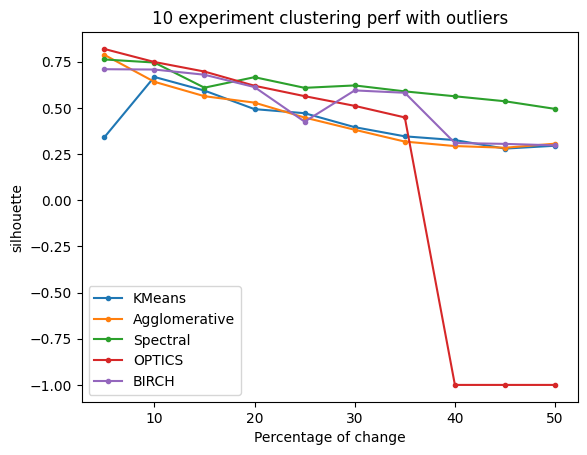

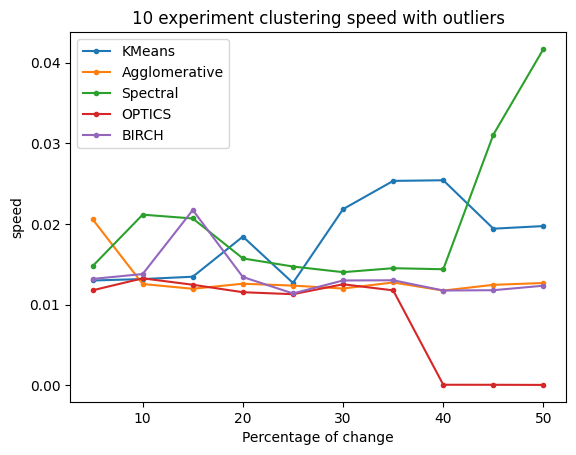

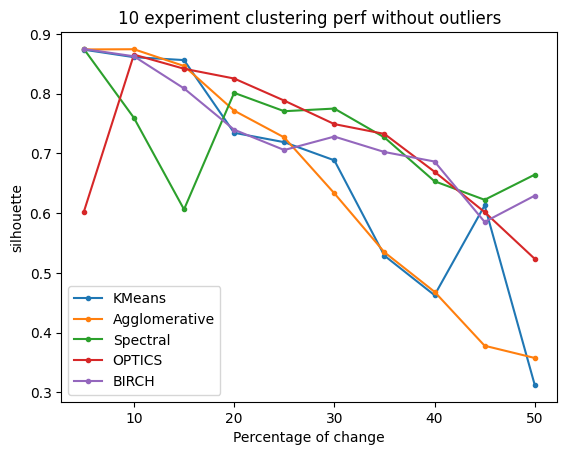

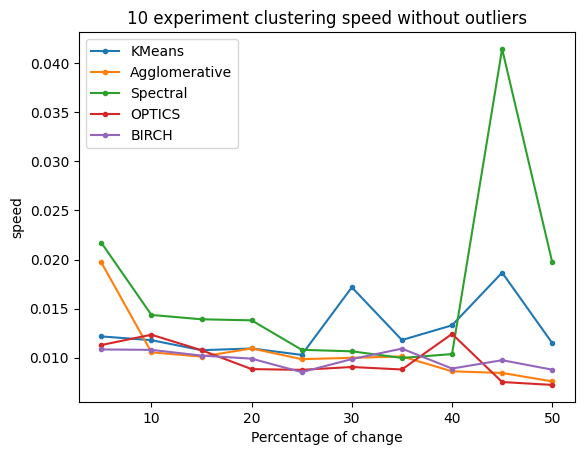

In [ ]:
outlier_distances = [2.0, 3.0, 4.0, 5.0, 7.0, 10.0, 15.0, 20.0, 25.0, 30.0]
outlier_percentages = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

# DATA COLLECTION
X = make_dataset_for_clustering(n_samples=1000, n_features=4, centers=2, cluster_std=1.0, center_box=(-10.0, 10.0), seed=2023)

# CREO IL DATAFRAME
df = pd.DataFrame(X, columns=['Colonna1', 'Colonna2', 'Colonna3', 'Colonna4'])

for distance in range(0,10):
  results_for_each_algorithm = []
  results_for_each_algorithm2 = []

  for algorithm in CLUSTERING_ALGORITHMS:
    results_single_algorithm = []
    results_single_algorithm2 = []

    for percentage in range(0,10):
      # PER OGNI DISTANZA VA A FARE 10 ESPERIMENTI SULLA PERCENTUALE
      df_outliers = make_outliers(df, outlier_percentages[percentage], outlier_distances[distance])

      # DATA ANALYSIS
      results_1_analysis = clustering(df_outliers, algorithm, 3, SEED)
      results_single_algorithm.append(results_1_analysis)

      index_outliers = KNN_outlierdetect(df_outliers)
      df_no_out = df_outliers.drop(index_outliers)

      #index_outliers = LOF_outlier_detection(df_outliers)
      #df_no_out = df_outliers.drop(index_outliers)

      #for column in df_outliers.columns:
        #indici_outliers = ZS(df_outliers[column], 3)
        #df_no_out = df_outliers.drop(indici_outliers)

      print("LO SHAPE è", df_no_out.shape)
      results_2_analysis = clustering(df_no_out, algorithm, 2, SEED)
      results_single_algorithm2.append(results_2_analysis)

    results_for_each_algorithm.append(results_single_algorithm)
    results_for_each_algorithm2.append(results_single_algorithm2)

  # RESULTS EVALUATION
  experiment = distance+1
  title_performance = str(experiment) + ' experiment clustering perf with outliers'
  title_speed = str(experiment) + " experiment clustering speed with outliers"
  plot(x_axis_values=outlier_percentages, x_label="Percentage of change", results=results_for_each_algorithm,title=title_performance, algorithms=CLUSTERING_ALGORITHMS, plot_type="performance")
  plot(x_axis_values=outlier_percentages, x_label="Percentage of change", results=results_for_each_algorithm,title=title_speed, algorithms=CLUSTERING_ALGORITHMS, plot_type="speed")

  title_performance = str(experiment) + ' experiment clustering perf without outliers'
  title_speed = str(experiment) + " experiment clustering speed without outliers"
  plot(x_axis_values=outlier_percentages, x_label="Percentage of change", results=results_for_each_algorithm2,title=title_performance, algorithms=CLUSTERING_ALGORITHMS, plot_type="performance")
  plot(x_axis_values=outlier_percentages, x_label="Percentage of change", results=results_for_each_algorithm2,title=title_speed, algorithms=CLUSTERING_ALGORITHMS, plot_type="speed")

#### Dimensionality

[113 183 261 273 363 413 614 622 819 897]
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTI

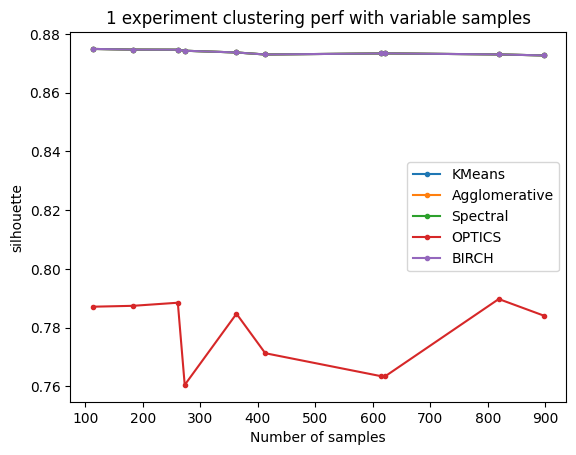

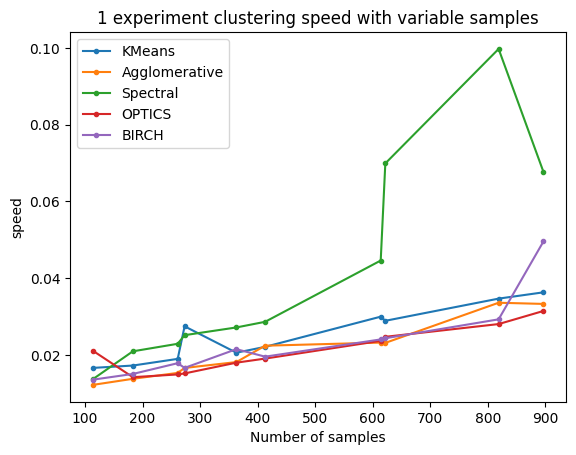

[141 230 290 351 545 614 715 920 983 995]
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTI

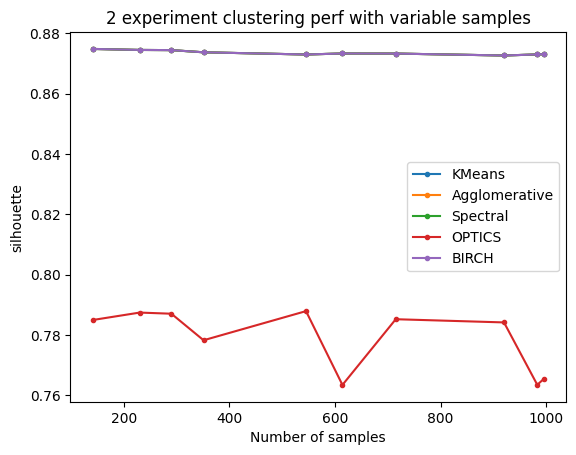

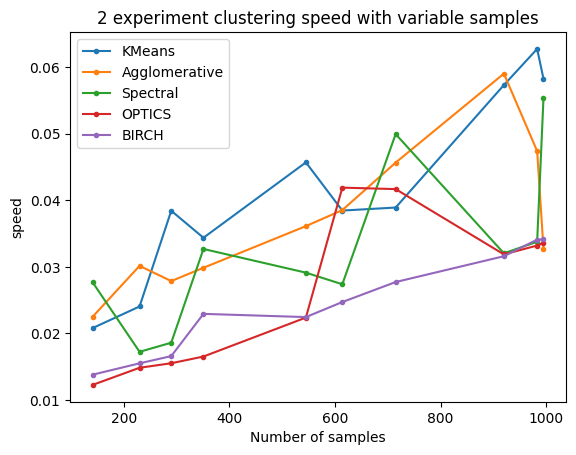

[190 218 335 336 468 552 621 644 717 863]
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTI

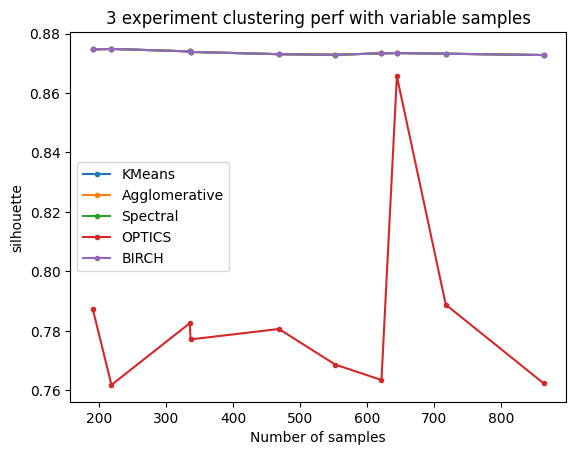

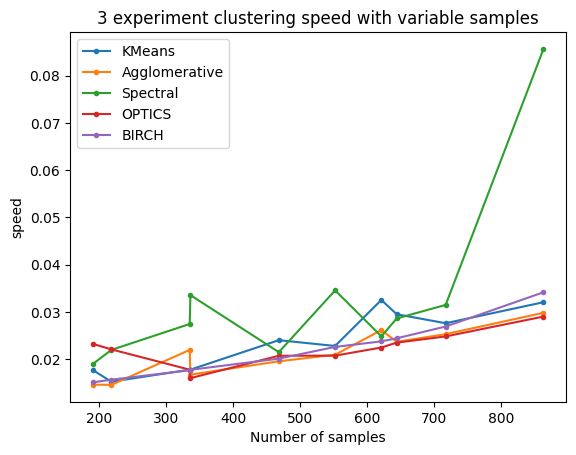

[134 276 345 647 669 706 781 879 921 956]
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTI

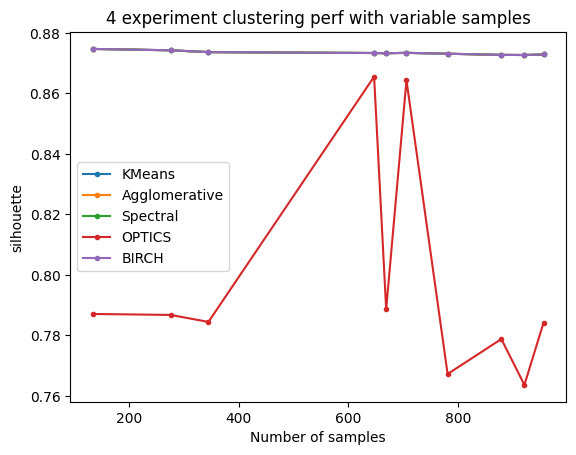

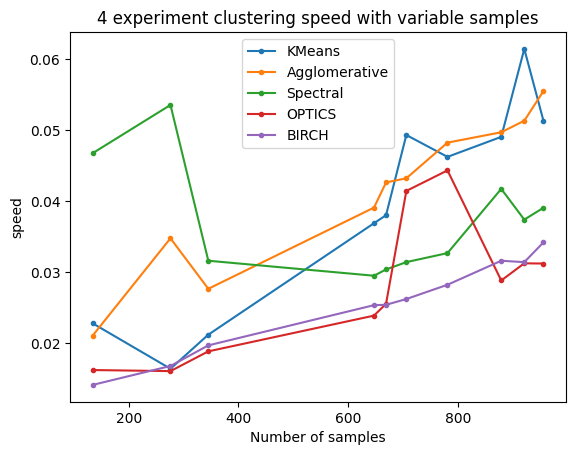

[393 407 423 520 521 525 672 758 861 966]
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTI

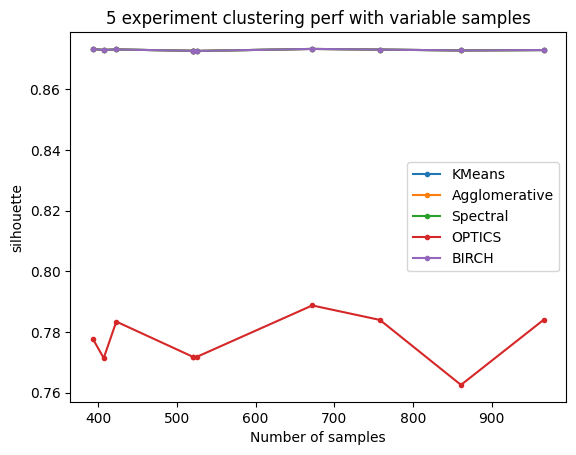

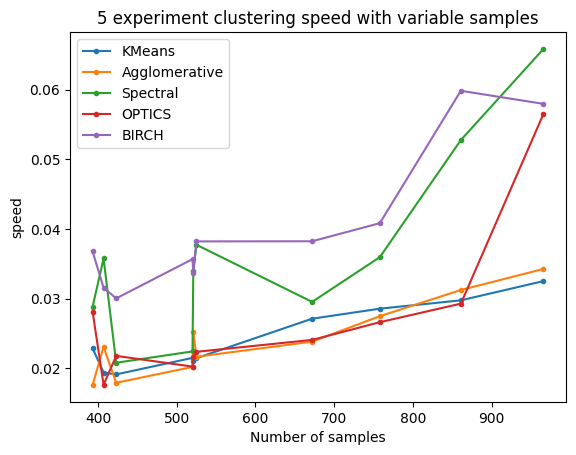

[142 149 150 251 354 438 441 563 582 673]
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTI

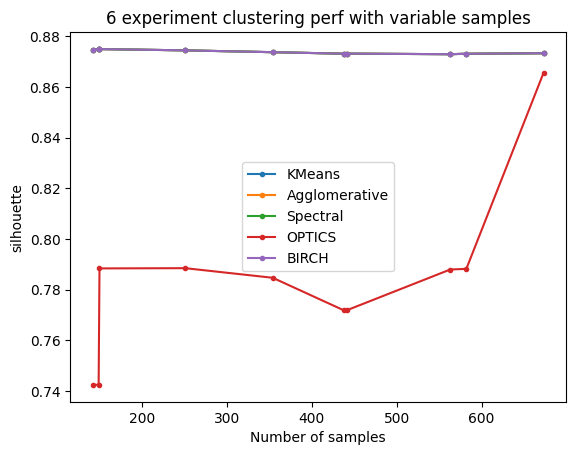

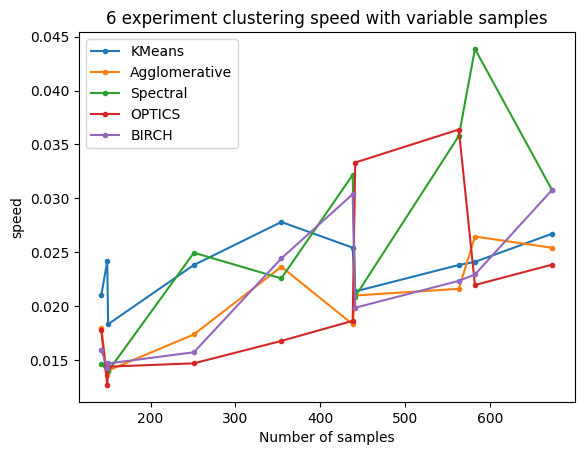

[205 206 337 400 425 473 622 655 930 976]
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTI

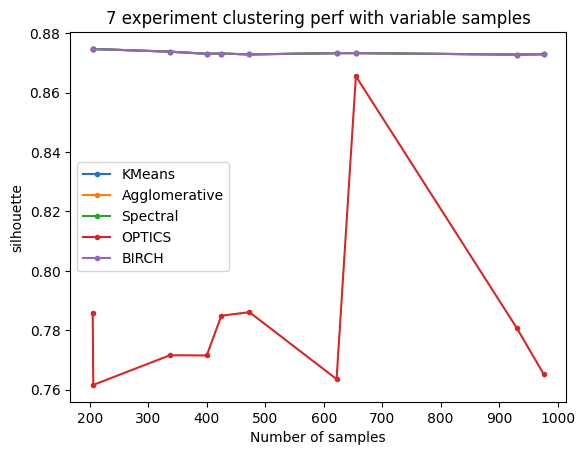

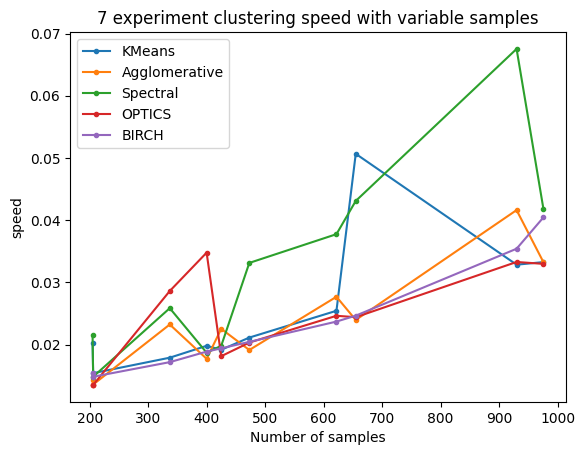

[185 271 301 411 609 638 838 867 912 922]
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTI

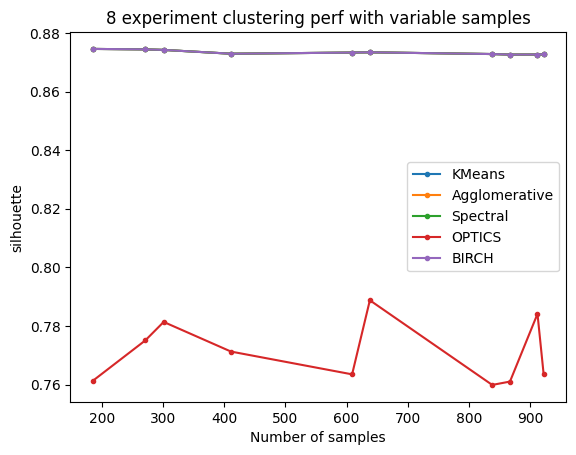

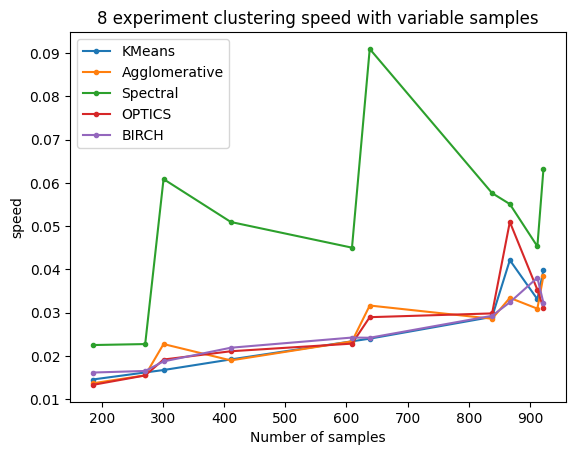

[148 197 328 335 599 600 623 653 825 880]
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTI

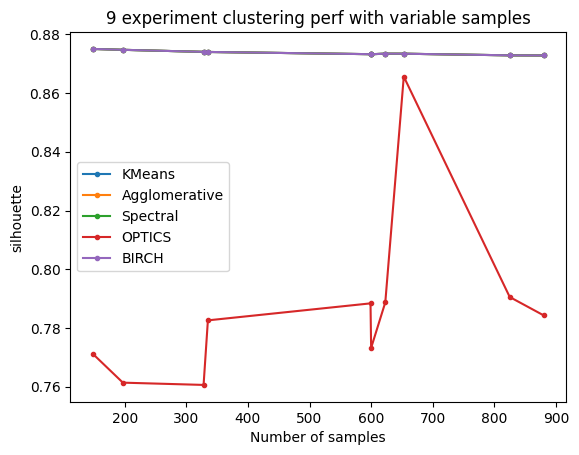

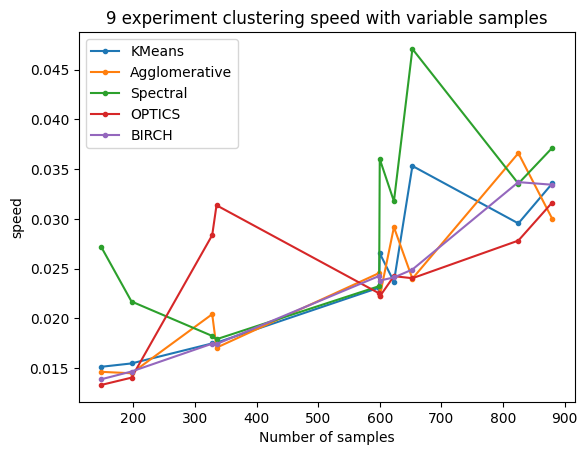

[136 147 150 160 442 472 501 652 673 991]
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTI

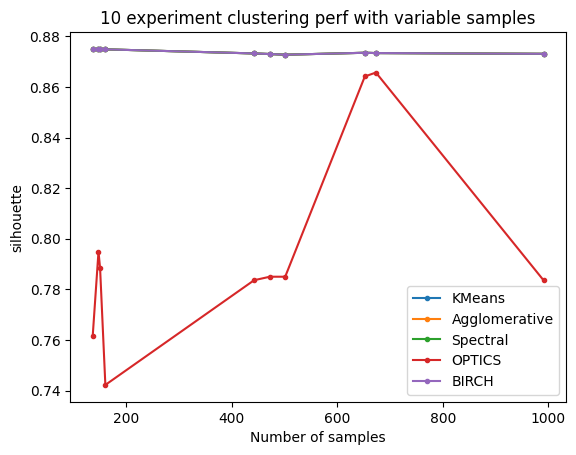

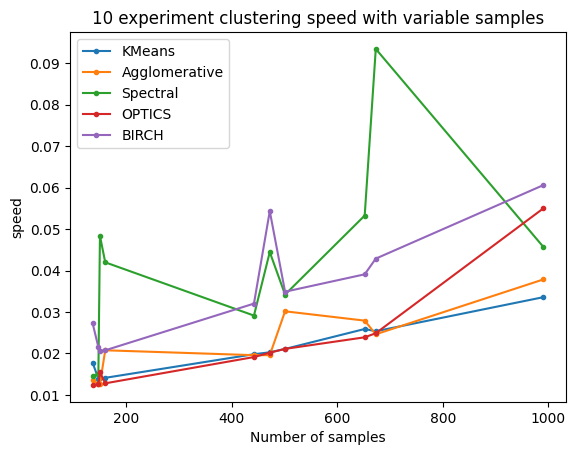

In [ ]:
# fixed feature and variable samples
for experiment in range(10):
  numeri_samples = np.random.choice(np.arange(100, 1000), size=10, replace=False)
  numeri_samples.sort()
  print(numeri_samples)

  results_for_each_algorithm = []
  for algorithm in CLUSTERING_ALGORITHMS:
    results_single_algorithm = []
    for i in numeri_samples:
      # DATA COLLECTION
      X = make_dataset_for_clustering(n_samples=1000+i, n_features=4, centers=2, cluster_std=1.0, center_box=(-10.0, 10.0), seed=2023)
      results_analysis = clustering(X, algorithm, 2, SEED)
      results_single_algorithm.append(results_analysis)

    results_for_each_algorithm.append(results_single_algorithm)

  # RESULTS EVALUATION
  time = experiment+1
  title_performance = str(time) + ' experiment clustering perf with variable samples'
  title_speed = str(time) + " experiment clustering speed with variable samples"
  plot(x_axis_values=numeri_samples, x_label="Number of samples", results=results_for_each_algorithm,title=title_performance, algorithms=CLUSTERING_ALGORITHMS, plot_type="performance")
  plot(x_axis_values=numeri_samples, x_label="Number of samples", results=results_for_each_algorithm,title=title_speed, algorithms=CLUSTERING_ALGORITHMS, plot_type="speed")

[ 1  2  3  4  7  8 10 12 13 14]
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Trai

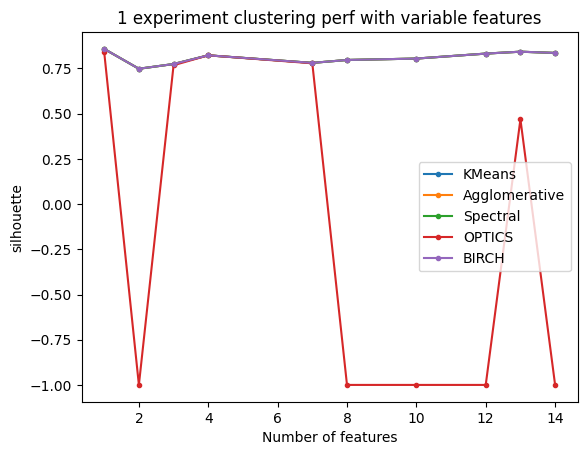

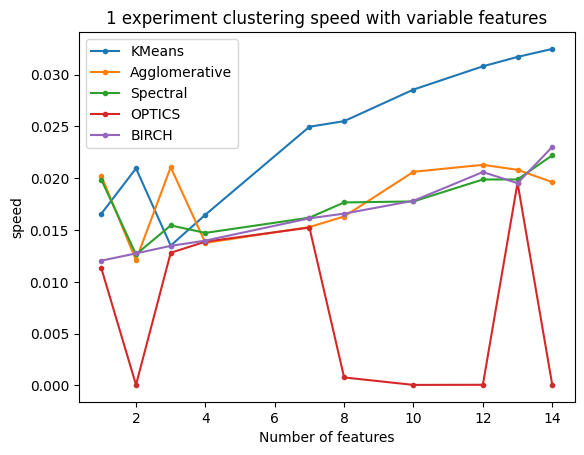

[ 1  2  3  6  7  8 10 11 12 14]
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Trai

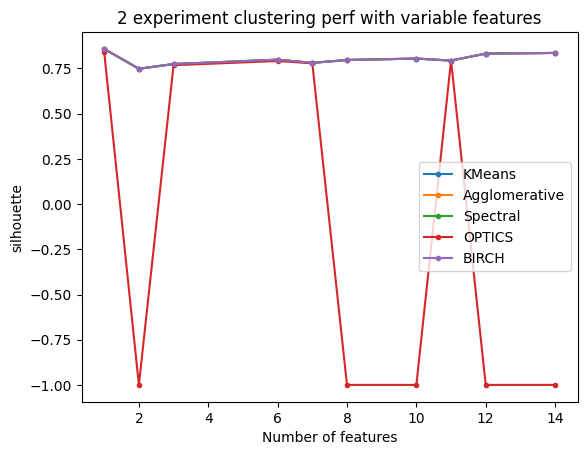

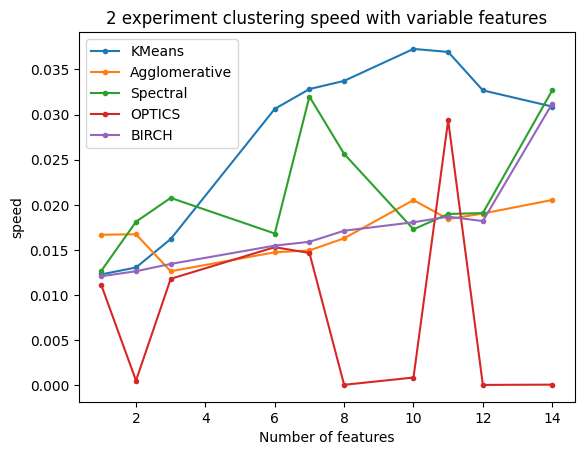

[ 1  2  3  4  7  8  9 10 11 14]
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Trai

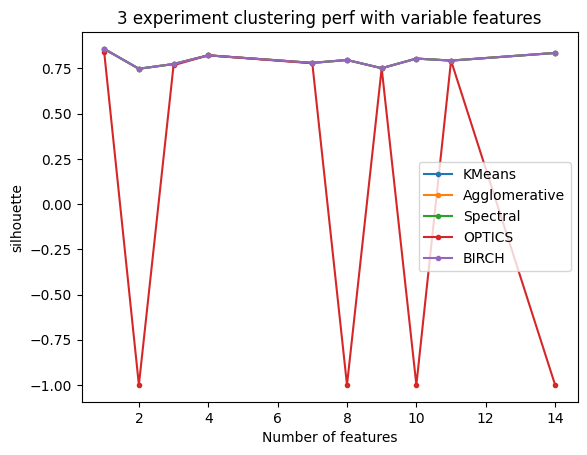

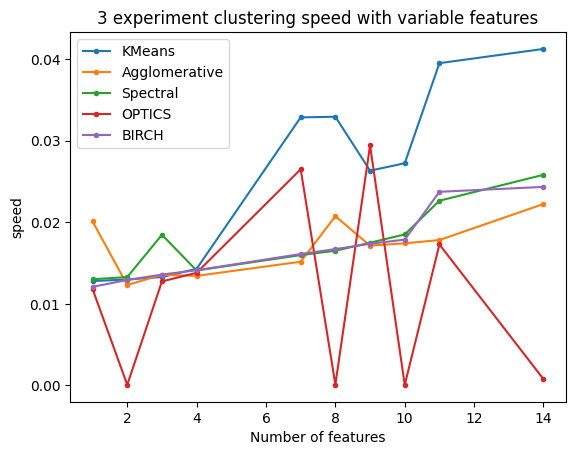

[ 1  2  3  4  5  6 10 11 12 14]
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Trai

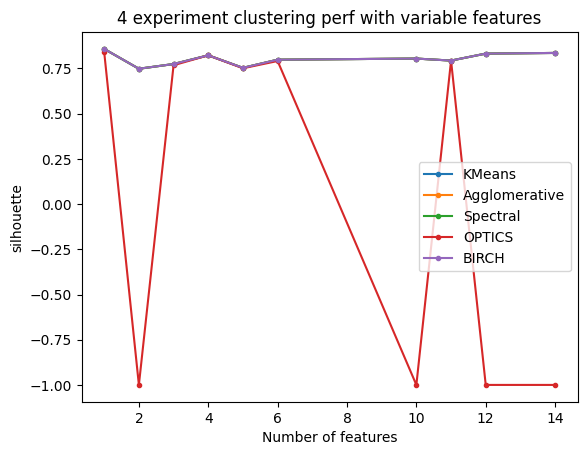

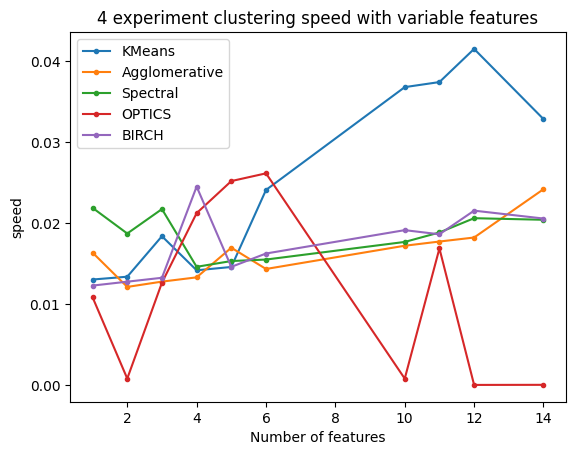

[ 2  3  4  6  8  9 10 11 12 13]
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Trai

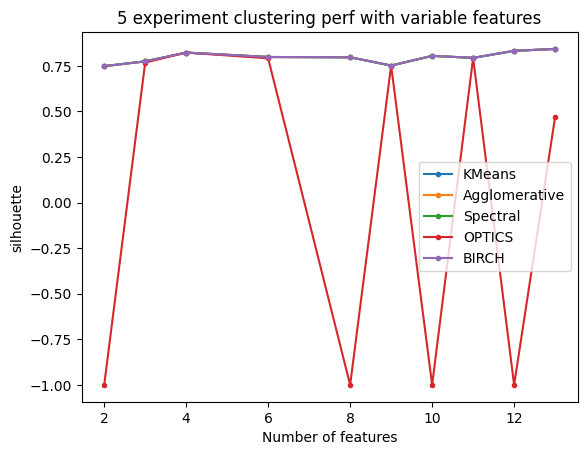

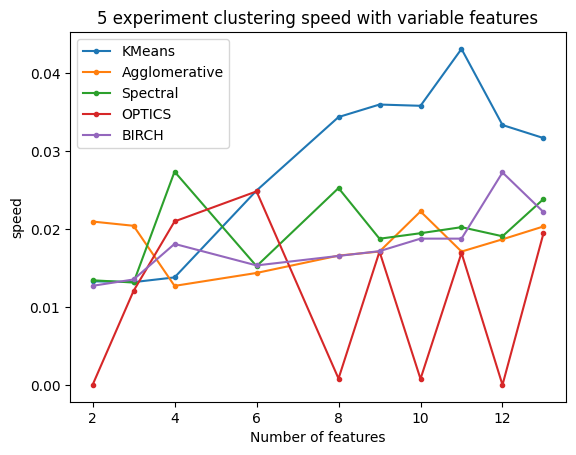

[ 1  2  3  5  7  8  9 11 13 14]
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Trai

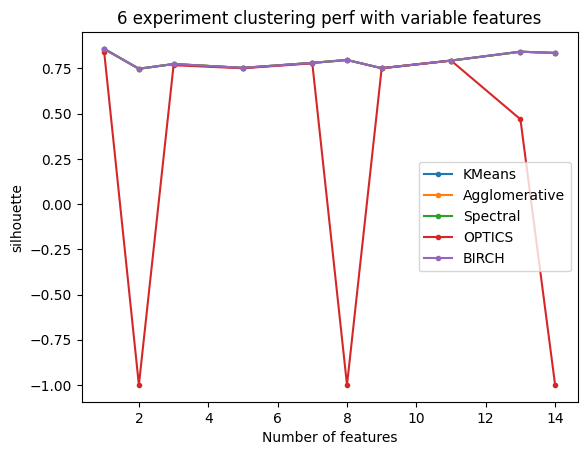

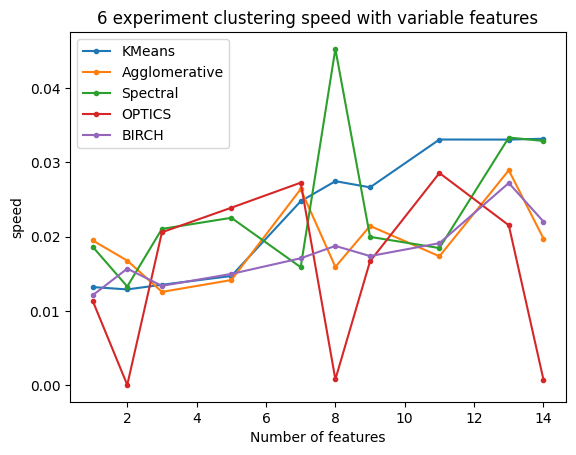

[ 1  3  4  5  6  7  8  9 12 13]
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Trai

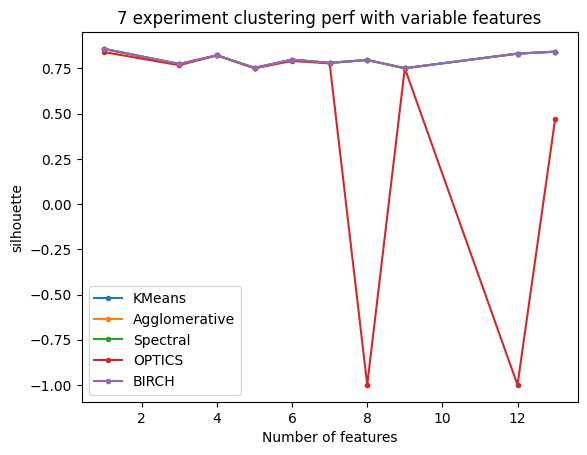

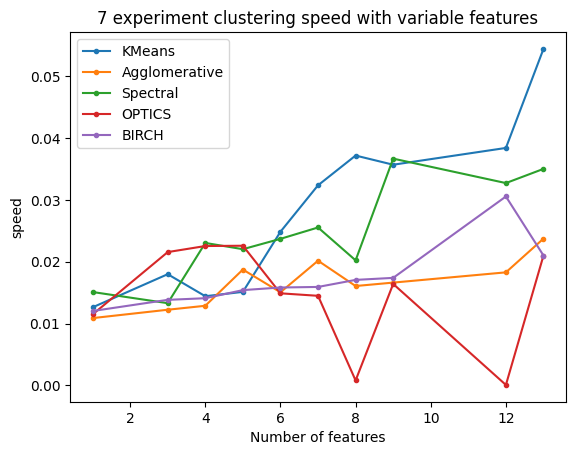

[ 1  2  3  4  6  7  9 10 11 13]
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Trai

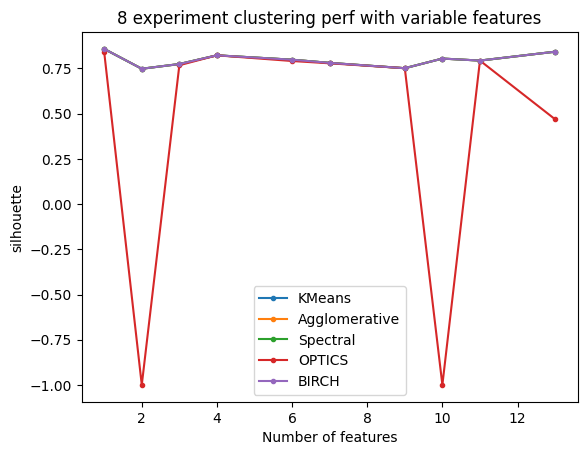

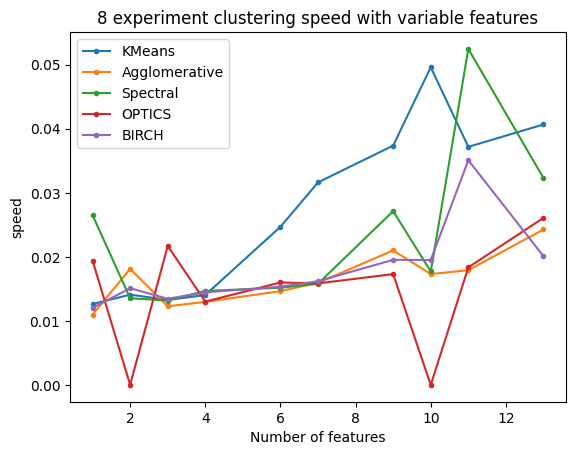

[ 1  2  3  4  6  7  8 11 13 14]
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Trai

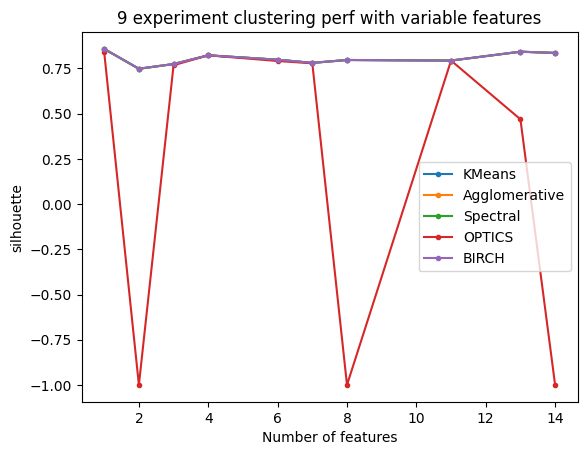

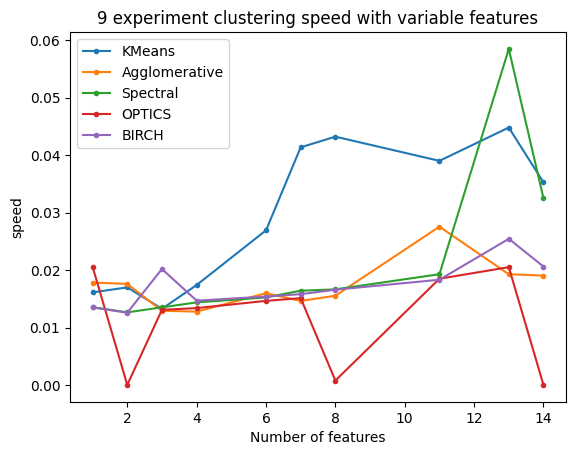

[ 1  2  3  4  5  6  7  8  9 11]
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for KMeans...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Agglomerative...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for Spectral...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Training for OPTICS...
Trai

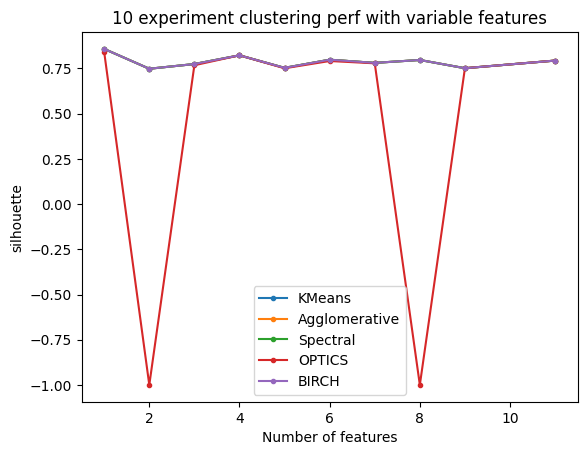

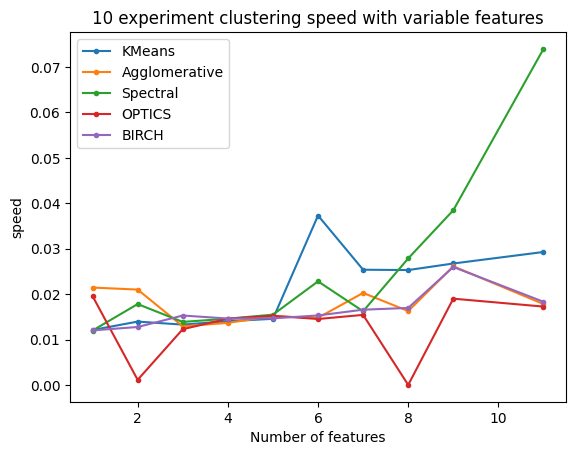

In [ ]:
# fixed samples and variable features
for experiment in range(10):
  numeri_features = np.random.choice(np.arange(1, 15), size=10, replace=False)
  numeri_features.sort()
  print(numeri_features)

  results_for_each_algorithm = []
  for algorithm in CLUSTERING_ALGORITHMS:
    results_single_algorithm = []
    for i in numeri_features:
      # DATA COLLECTION
      X = make_dataset_for_clustering(n_samples=1000, n_features=4+i, centers=2, cluster_std=1.0, center_box=(-10.0, 10.0), seed=2023)
      results_analysis = clustering(X, algorithm, 2, SEED)
      results_single_algorithm.append(results_analysis)

    results_for_each_algorithm.append(results_single_algorithm)

  # RESULTS EVALUATION
  time = experiment+1
  title_performance = str(time) + ' experiment clustering perf with variable features'
  title_speed = str(time) + " experiment clustering speed with variable features"
  plot(x_axis_values=numeri_features, x_label="Number of features", results=results_for_each_algorithm,title=title_performance, algorithms=CLUSTERING_ALGORITHMS, plot_type="performance")
  plot(x_axis_values=numeri_features, x_label="Number of features", results=results_for_each_algorithm,title=title_speed, algorithms=CLUSTERING_ALGORITHMS, plot_type="speed")